Text(0, 0.5, 'Passengers')

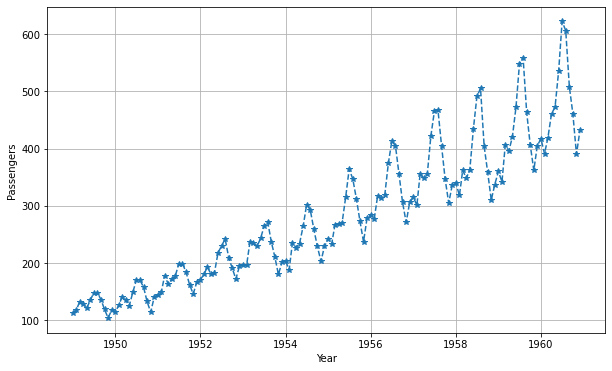

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
#convert column to datetime
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Passengers, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [6]:
#check for missing values
df.isnull().values.any()

False

In [7]:
#There are not missing values in our dataset, however in bid to explain how we handled
#missing values, we will make a copy of our dataset and delete some values randomly
df_copy = df.copy()
rows = df_copy.sample(frac=0.1, random_state=0)
rows["Passengers"] = np.nan
df_copy.loc[rows.index,  'Passengers'] = rows["Passengers"]
df_copy.isnull().sum()

Passengers    14
dtype: int64

In [8]:

#There are now 14 missing values in the dataset
#Filling missing values with imputation- foward fill
df_copy_ffill = df_copy.fillna(method='ffill')
df_copy_ffill.isnull().sum()
#filling missing values with imputation- backward fill
df_copy_bfill = df_copy.fillna(method='bfill')
df_copy_bfill.isnull().sum()


Passengers    0
dtype: int64

In [9]:
#filling missing data by interpolation
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward')
df_copy_LIF.isnull().sum()
df_copy_LIB = df_copy.interpolate(method='linear', limit_direction='backward')
df_copy_LIB.isnull().sum()


Passengers    0
dtype: int64

            Passengers
Month                 
1949-01-31  112.000000
1949-04-30  126.333333
1949-07-31  134.666667
1949-10-31  134.333333
1950-01-31  112.333333
1950-04-30  134.000000
1950-07-31  148.000000
1950-10-31  153.666667
1951-01-31  133.000000
1951-04-30  163.666667
1951-07-31  183.000000
1951-10-31  181.666667
1952-01-31  161.000000
1952-04-30  184.666667
1952-07-31  210.333333
1952-10-31  214.000000
1953-01-31  187.333333
1953-04-30  222.333333
1953-07-31  245.333333
1953-10-31  240.000000
1954-01-31  195.000000
1954-04-30  216.666667
1954-07-31  266.666667
1954-10-31  260.333333
1955-01-31  224.666667
1955-04-30  256.333333
1955-07-31  316.333333
1955-10-31  311.000000
1956-01-31  266.333333
1956-04-30  302.333333
1956-07-31  368.333333
1956-10-31  355.333333
1957-01-31  297.333333
1957-04-30  335.000000
1957-07-31  414.000000
1957-10-31  406.000000
1958-01-31  327.000000
1958-04-30  342.666667
1958-07-31  429.666667
1958-10-31  422.666667
1959-01-31  335.666667
1959-04-30 

Text(0.5, 1.0, 'Downsampled Data')

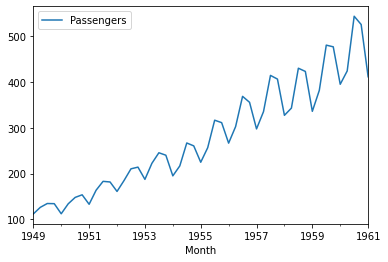

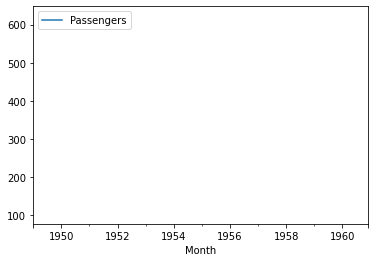

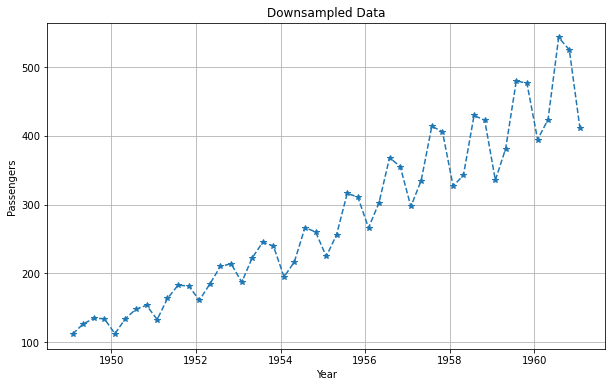

In [10]:
#downsample to a quarterly data points
from matplotlib import pyplot
df_quarterly = df.resample('3M').mean()
print(df_quarterly)
df_quarterly.plot()
df_daily = df.resample('D').mean()
df_daily.plot()
plt.show
plt.figure(figsize=(10,6))
plt.plot(df_quarterly.index, df_quarterly.Passengers, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Downsampled Data')


Text(0, 0.5, 'Passengers')

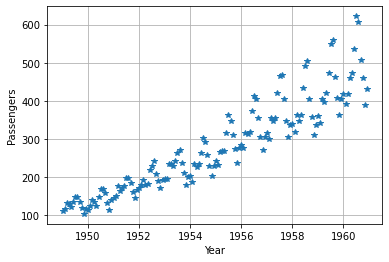

In [11]:
#upsample to a daily data points
df_daily = df.resample('D').mean()
plt.plot(df_daily.index, df_daily.Passengers, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

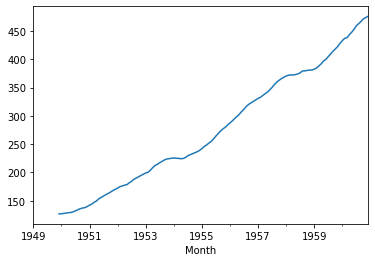

In [12]:
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean()
MA.plot()
plt.show()
import warnings
warnings.filterwarnings("ignore")

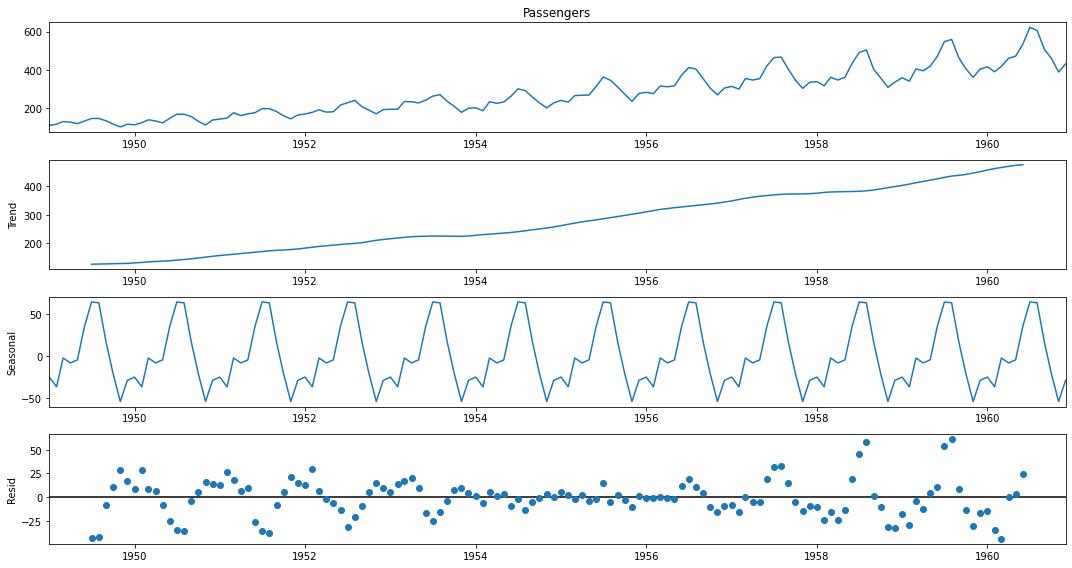

In [13]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model='additive')
decompose_series.plot()
plt.show()

In [14]:
#the decomposed time series show an obvious increasing trend and seasonal variations.
#recall that we have initially plotted the moving average over the past 12 months. which shows that it varies with time.
#this suggfest that the data is not stationary. we will now perform an ADT test to confirm the speculation.

from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['Passengers'])
print(f'ADF Statistics: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observation used: {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f' {k}: {v}')


ADF Statistics: 0.8153688792060423
p-value: 0.9918802434376409
No. of lags used: 13
No. of observation used: 130
Critical Values:
 1%: -3.4816817173418295
 5%: -2.8840418343195267
 10%: -2.578770059171598


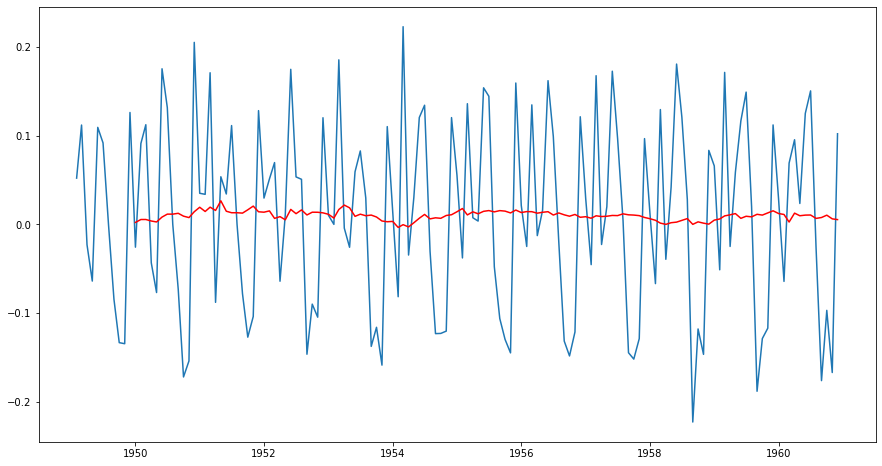

In [15]:
#from the result obtained, it shows that the p-value is greater than critical values at 5% significance level
#and the ADF Statistic is greater than any of the critical values obtained. this confirms that the series is indeed non-stationary

#convert time series to stationary by removing trend and seasonality
#transforming and differencing 
df_log = np.log(df)
df_diff = df_log.diff(periods=1)
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')


In [16]:
df_diff = df_diff.fillna(method='bfill')

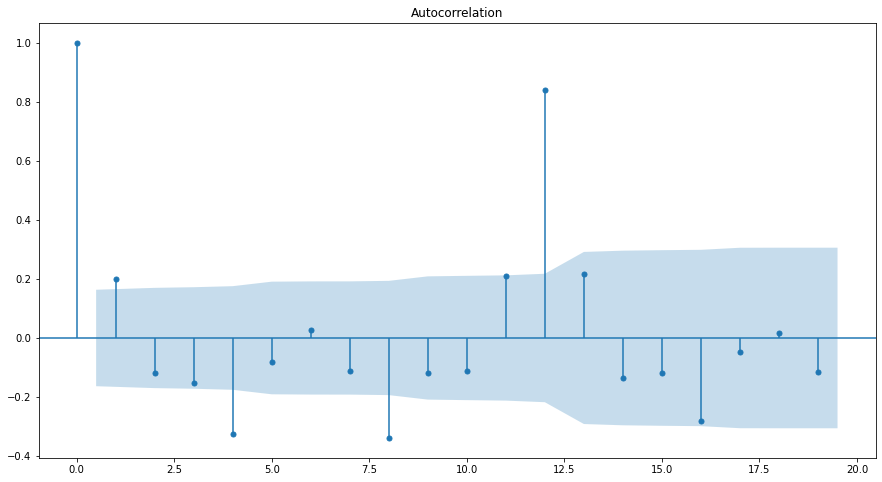

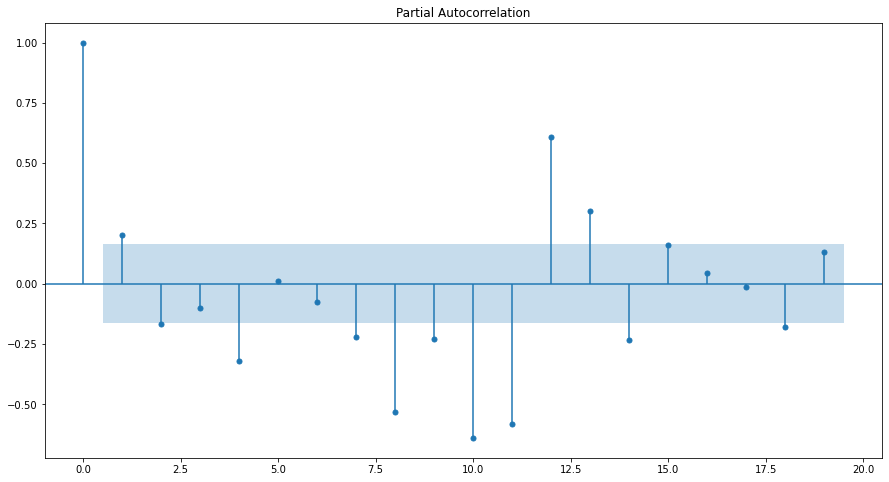

In [17]:
#Time series forecasting using stochastic model
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")
#ACF
plot_acf(df_diff, lags = range(0, 20))
plt.show()       
#PACF
plot_pacf(df_diff, lags = range(0, 20))
plt.show()

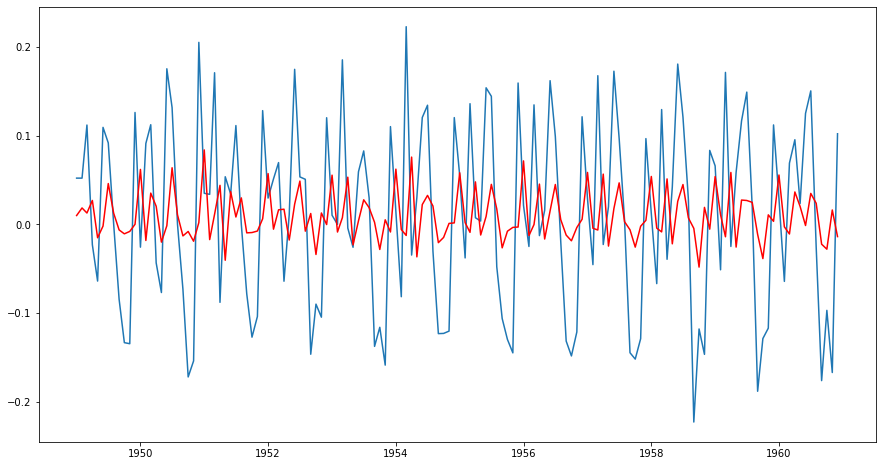

In [18]:
#the shaded regions in the plots are the confidence intervals. The lags where the PACF
#And ACF charts cross this region are the values of p and q respectively. in both plots, p=q=1.
#the shaded regions in the plots are the confidence intervals. the lags where the PACF and
#ACF charts cross this region are the values of p and q respectively.
#In the ACF plot, there is one lag that crosses the significance level hence, q=1. similarly #in the PACF plot, p=2

#AR, MA, and ARIMA
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
#(p, d, q)
AR_model = ARIMA(df_diff, order=(2,0,0),)
AR_model_results = AR_model.fit()
plt.plot(df_diff)
plt.plot(AR_model_results.fittedvalues, color='red')
plt.show()


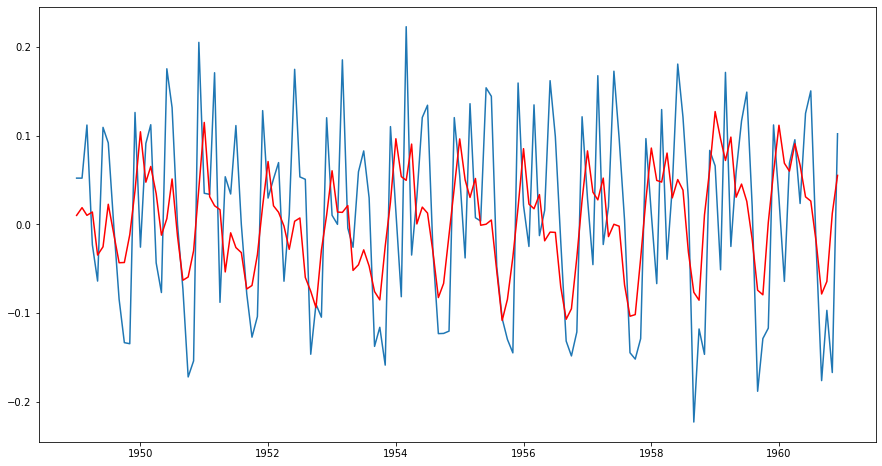

In [19]:
ARIMA_model = ARIMA(df_diff, order=(2,0,1))
ARIMA_results = ARIMA_model.fit()
plt.plot(df_diff)
plt.plot(ARIMA_results.fittedvalues, color='red')


In [20]:
conda install gcc


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/win-64'




In [21]:
conda install c- conda-forge fbprophet -y

Note: you may need to restart the kernel to use updated packages.




CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/win-64'




In [32]:
conda install c- conda-forge Prophet


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/win-64'




In [24]:
!pip install --upgrade plotly

In [25]:
!pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Olamide\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Olamide\\AppData\\Local\\Temp\\pip-install-kd7qw454\\fbprophet_8c47385514164f1b8c03ecd6747f4f46\\setup.py'"'"'; __file__='"'"'C:\\Users\\Olamide\\AppData\\Local\\Temp\\pip-install-kd7qw454\\fbprophet_8c47385514164f1b8c03ecd6747f4f46\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Olamide\AppData\Local\Temp\pip-wheel-i1jjtkzf'
       cwd: C:\Users\Olamide\AppData\Local\Temp\pip-install-kd7qw454\fbprophet_8c47385514164f1b8c03ecd6747f4f46\
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  INFO:pystan:COMPILING THE C++ CODE

In [35]:
from fbprophet import Prophet
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

ModuleNotFoundError: No module named 'fbprophet'

In [26]:

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df = df.rename(columns={"Month": "ds", "Passengers": "y" })
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
